The idea behind the trajbang algorithm was to design trajectories which are made of a given number of integrations of a bang-bang command.

the resulting trajectory will then complies with:

* each integration level is available (which is convenient for feed-forward stage)
* the trajectory respect minimum and maximum criteria on each level of integration


# level 3

This trajbang algorithm consists of 3 levels (hence two integrations) :

* first level is the jerk, which can be null or maximal
* the second level is the acceleration (first order integration of the jerk)
* the third level is the speed (second order integration of the jerk)

The solution depend on:

* the initial conditions (on acceleration $A_0$ and speed $S_0$).
* the final objectives on speed $S_g$ (acceleration being null at the end).
* the defined maximal acceleration $A_m$ and maximal jerk $J_m$

In [9]:
import math
import sys

import IPython.display    

sys.path.append('.')

import sympy
from sympy import symbols as sym

def print_m(x) :
    IPython.display.display(IPython.display.Math(sympy.latex(x)))

J_m, A_m, A_0, S_0, S_g = sym('J_m A_m A_0 S_0 S_g')

import analytical
import plot

For each cases below: 

* the value `dur` returned is the duration of each phases
* the value `cmd` is the value of the jerk for each phases

The total time is then the sum of each durations. The total distance can be obtained with an extra integration step (to be implemented)

## case A

We start with an acceleration equal to zero, and we have the time to reach maximal acceleration

In [10]:
bch, cmd, dur, val = analytical.compute_3(1.0, 1.0, 0.0, 0.0, 2.0)
print_m(dur)

<IPython.core.display.Math object>

d =  [1.0, 1.0, 1.0, 1.0]
t =  [0. 1. 2. 3. 4.]
z =  [1.0, 0.0, -1.0, 0.0]
acc:  0.00000,  1.00000,  1.00000,  0.00000,  0.00000
spd:  0.00000,  0.50000,  1.50000,  2.00000,  2.00000


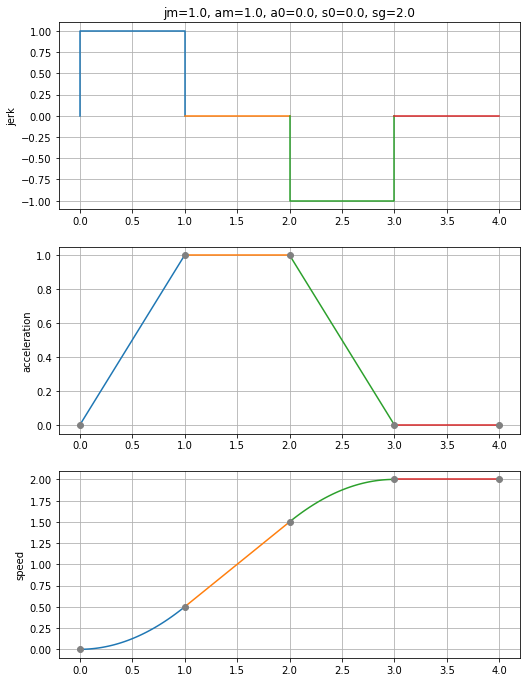

In [11]:
a_lst, s_lst = plot.plot_3(cmd + [0.0,], [float(d.subs(val)) for d in dur] + [1.0,], val, bch)

## Case B

We start with an acceleration equal to zero, but have no time to reach maximal acceleration

In [12]:
bch, cmd, dur, val = analytical.compute_3(1.0, 1.0, 0.0, 0.0, 0.5)
print_m(dur)

<IPython.core.display.Math object>

d =  [0.7071067811865476, 0.7071067811865476, 1.0]
t =  [0.         0.70710678 1.41421356 2.41421356]
z =  [1.0, -1.0, 0.0]
acc:  0.00000,  0.70711,  0.00000,  0.00000
spd:  0.00000,  0.25000,  0.50000,  0.50000


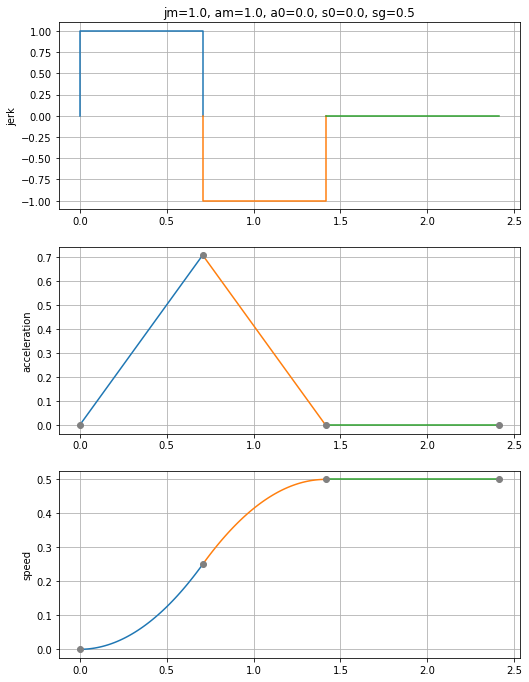

In [13]:
a_lst, s_lst = plot.plot_3(cmd + [0.0,], [float(d.subs(val)) for d in dur] + [1.0,], val, bch)

## Case E

The current acceleration has an opposite sign compared to the target speed

In [6]:
bch, cmd, dur, val = analytical.compute_3(1.0, 1.0, 0.75, 0.0, -2.0)
print(bch)
print_m(dur)

E+


<IPython.core.display.Math object>

d =  [0.75, 1.0, 1.28125, 1.0, 1.0]
t =  [0.      0.75    1.75    3.03125 4.03125 5.03125]
z =  [-1.0, -1.0, 0.0, 1.0, 0.0]
acc:  0.75000,  0.00000, -1.00000, -1.00000,  0.00000,  0.00000
spd:  0.00000,  0.28125, -0.21875, -1.50000, -2.00000, -2.00000


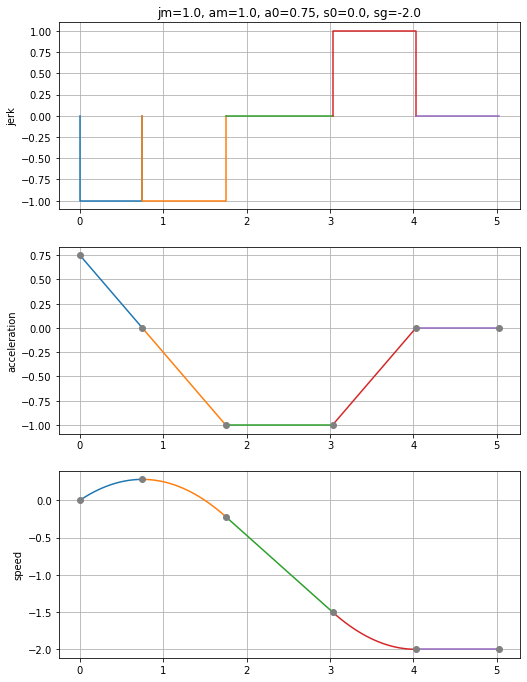

In [7]:
a_lst, s_lst = plot.plot_3(cmd + [0.0,], [float(d.subs(val)) for d in dur] + [1.0,], val, bch)

etc.